# 2019 Ford GoBikes (Part 2/2)


### by Destiny Nwachukwu
### as Capstone Project in Udacity Data Analyst Nanodegree

## Investigation Overview
>As the capstone project for the Udacity Data Analysis Nanodegree course, this project's two halves show the significance and utility of data visualization approaches in the data analysis process.

>I will create a brief presentation that highlights the intriguing characteristics, patterns, and connections I found in the chosen (cleaned) dataset for the next second half of the project (2/2). (Based on another file 2019-fordgobike-tripdata clean, a project part 1 output.


## Dataset Overview

>Bay Wheels is a regional public bicycle sharing program run by Motivate in collaboration with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District in the San Francisco Bay Area, California. [3] The first regional and extensive bicycle sharing program to be implemented on the West Coast of the United States is called Bay Wheels. In August 2013, it became known as Bay Area Bike Share. Over 2,600 bicycles were available through the Bay Wheels system at 262 stations in San Francisco, the East Bay, and San Jose as of January 2018. In a collaboration with Ford Motor Company, the system was formally re-launched as Ford GoBike on June 28, 2017. The system was later renamed to Bay Wheels in June following Motivate's acquisition by Lyft.

>The dataset contains 183215 observations, and has 14 columns focusing on the bike trip details; the trip duration, start and end times, start and end stations info, and some informations related to the users. Some observations were eliminated from the dataset due to presence of nan values or outliers.

In [2]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.patches as mpatches
import calendar
import math
import time
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('clean_2019fordgobike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char,day_of_week,state_of_day,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,2,Feb,17,afternoon,3,Thu,Thursday,Weekday,35
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,No,2,Feb,12,afternoon,3,Thu,Thursday,Weekday,47
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,No,2,Feb,17,afternoon,3,Thu,Thursday,Weekday,30
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Yes,2,Feb,23,night,3,Thu,Thursday,Weekday,45
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,No,2,Feb,23,night,3,Thu,Thursday,Weekday,60


### Day with most trips

In [4]:
weekend_color=sb.color_palette()[1]
weekday_color=sb.color_palette()[0]
color=[weekday_color,weekday_color,weekday_color,weekday_color,
       weekday_color,weekend_color,weekend_color]
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

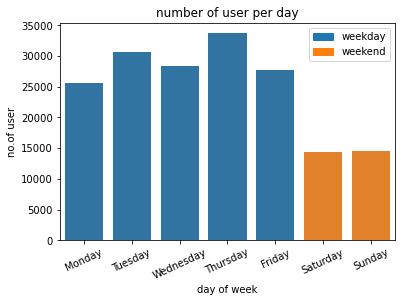

In [5]:
sb.countplot(data=df,x='day_of_week',palette=color,order=order)
plt.xticks(rotation=25)
plt.title('number of user per day')
plt.ylabel('no.of user')
plt.xlabel('day of week')

# create alegend
red_patch = mpatches.Patch(color=weekday_color, label='weekday')
pathch=mpatches.Patch(color=weekend_color,label='weekend')
plt.legend(handles=[red_patch,pathch])
plt.show()

### Bikers Age

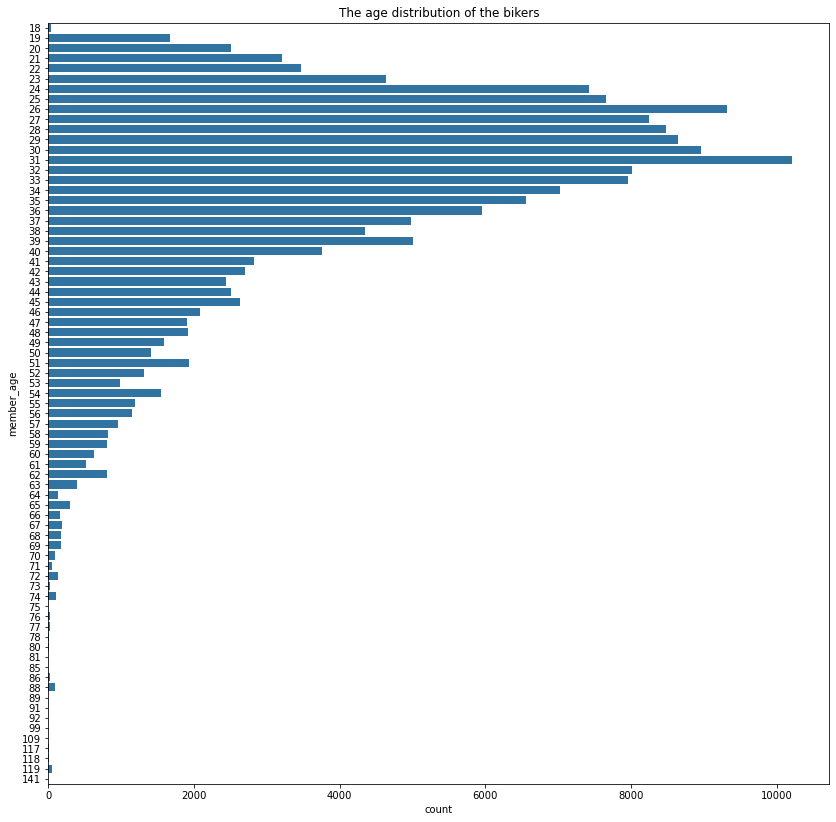

In [6]:
# By plotting Bar chart , we can identify the disturbution of bikers ages.
base_color = sb.color_palette()[0]
plt.figure(figsize=[14, 14])

ax = sb.countplot(data = df, y = 'member_age', color = base_color)
# Set title
ax.set_title("The age distribution of the bikers")
plt.show()


## The top 8 stations with the most trips


In [4]:
# Location: there are 329 start stations. 
print(len(df['start_station_name'].value_counts()))
df['start_station_name'].value_counts()

329


Market St at 10th St                                         3639
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3391
Berry St at 4th St                                           2942
Montgomery St BART Station (Market St at 2nd St)             2703
Powell St BART Station (Market St at 4th St)                 2605
                                                             ... 
Farnam St at Fruitvale Ave                                      9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [5]:
# Subset the dataset by keeping only top 8 locations with high traffics, df_top8. 
locs = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
df_top8 = df.loc[df['start_station_name'].isin(locs)]

In [6]:
# After subsetting top 8 station with the most trip, create a countplot to see the distribution and order from top 1 to top 8
st_stat_counts = df_top8['start_station_name'].value_counts()
st_stat_order = st_stat_counts.index

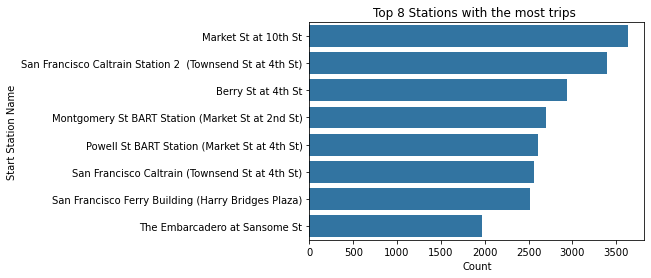

In [7]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_top8, y='start_station_name', color=base_color, order=st_stat_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 8 Stations with the most trips ');

## Bivariate

In [8]:
# Prepare lists of numeric variables and categorical variables
times = ['period_day','start_weekday_char','start_month_char']
users= ['user_type','member_gender']

In [9]:
# Order top 8 stations from the number one (most trips) to the number eight (least trips)
loc_cl = locs = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
loc_cl2 = pd.api.types.CategoricalDtype(ordered=True, categories=loc_cl)
df['start_station_name'] = df['start_station_name'].astype(loc_cl2)

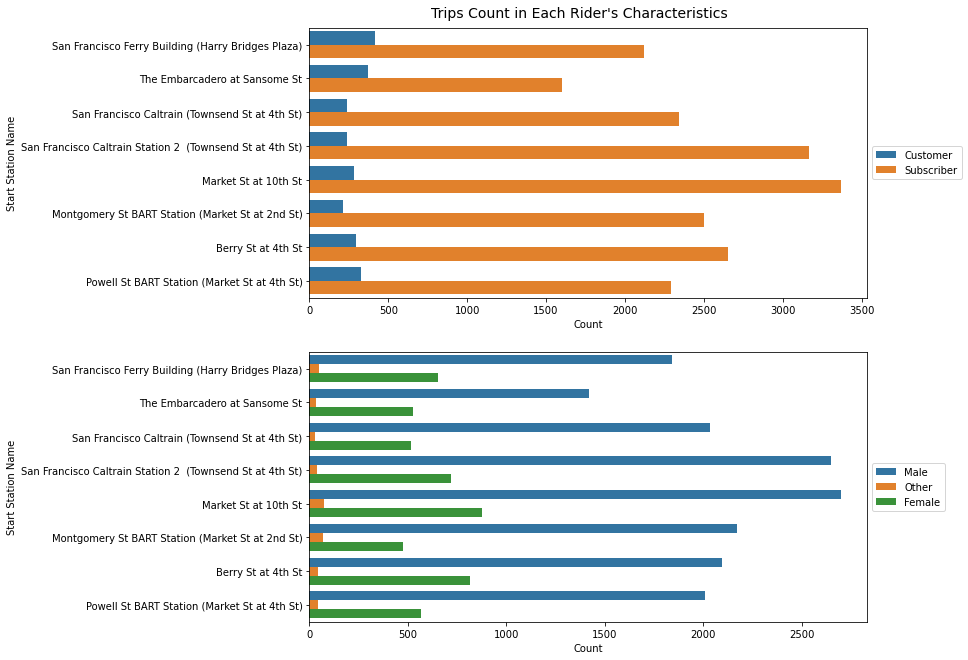

In [10]:
# 3. Categorical variables by plotting countplot: top 8 stations by users' attributes (user_type, member's gender)
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count in Each Rider\'s Characteristics' , fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    sb.countplot(data=df, y='start_station_name', hue=users[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name')
    plt.xlabel('Count');

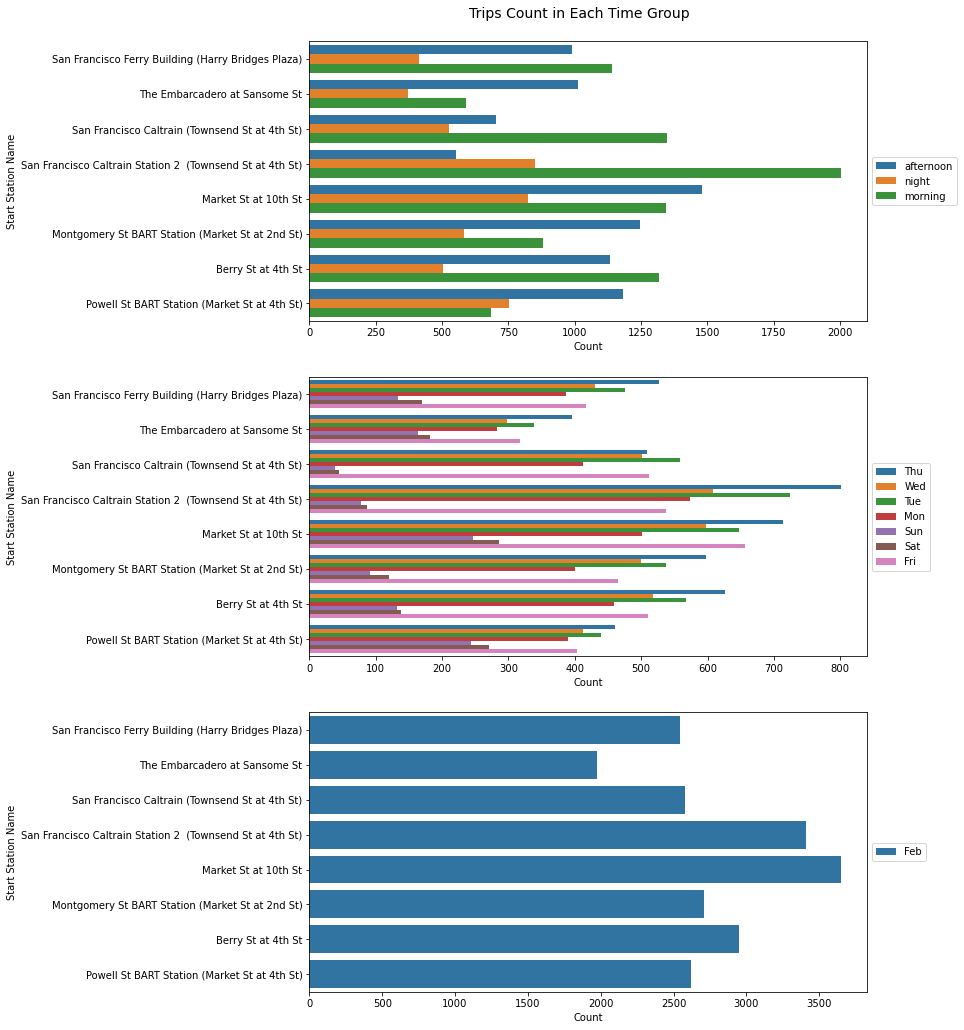

In [11]:
# 2. Categorical variables by plotting countplot: top 8 stations by times (time of day, weekdays, months)
fig = plt.figure(figsize=(10,16))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count in Each Time Group', fontsize=14)
for i in range(1, 4):
    ax = fig.add_subplot(3, 1, i)
    sb.countplot(data=df, y='start_station_name', hue=times[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name')
    plt.xlabel('Count');

After breaking down into each station,  
1. Time of day: morning is not necessary the period of time with most trips. Half of stations have the most trips during the morning and another half of stations has the most trips during the afternoon. It needs to be investigated more.  
2. Day of week: weekdays (Monday, Tuesday, Wednesday, Thursday and Friday) have the most trips than weekends. Compared to other weekdays, Friday has less trips.  
3. All trips happened in the mont of February

## Multivariate


In [13]:
# Let's take a look at gender groups in time and locations
df_f = df.query('member_gender == "Female"')
df_m = df.query('member_gender == "Male"')

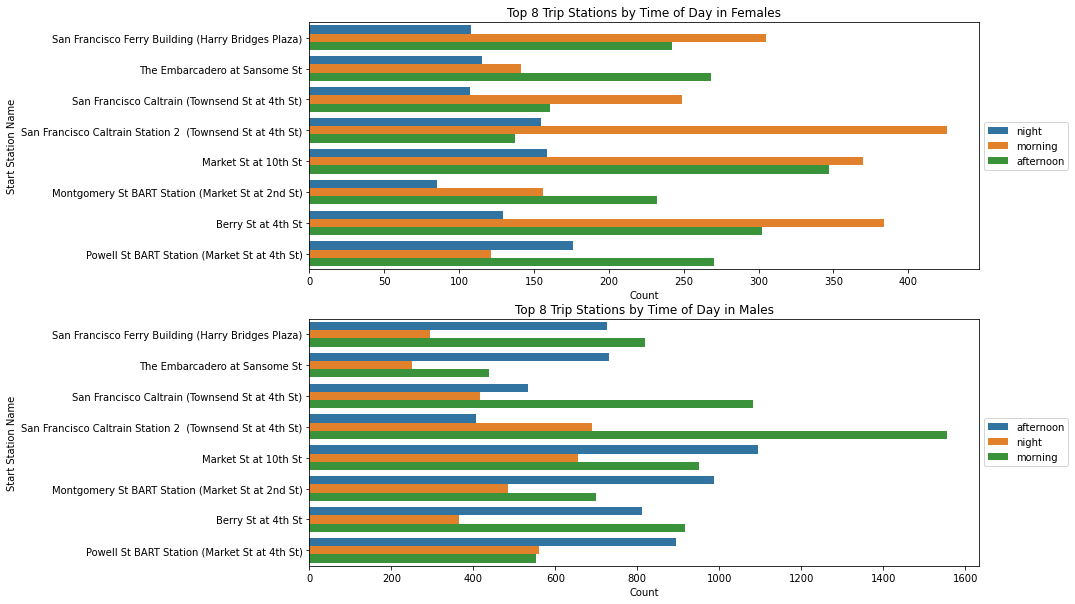

In [14]:
# (2) Top 8 trip stations by times in each gender
# 1. 3 categorical variables using countplot: Time of day
plt.figure(figsize=(12,10))
ax = plt.subplot(211)
sb.countplot(data=df_f, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Time of Day in Females')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(212)
sb.countplot(data=df_m, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 8 Trip Stations by Time of Day in Males')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

In [ ]:
 !jupyter nbconvert  Dataset_Exploration_Ford_GoBikes(Part2).ipynb --to slides --no-input